# UBC Learning Analytics Hackathon 3.0 
## Matthew Yuen

The data from this project is from the open source at [Harvard Dataverse, Canvas Network](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/1XORAL). 

Some background on the data: 

* Dataset is comprised of open courses offered by the Canvas Network from January 2014 to September 2015. 
* Includes over 325,000 aggregate records. 
* Course counts: Mathematics and Statistics (7), Professions and Applied Sciences (73), Medical Pre-Medical (5), Education (57), Interdisciplinary & Other (16), Social Sciences (8), Business and Management (28), Humanities (29), Computer Science (9), Physical Sciences (6) $\rightarrow$ Total Number of Courses is 238. 

More information can be found [here](https://dataverse.harvard.edu/file.xhtml?fileId=2789855&version=RELEASED&version=.0). 

## Contents: 

1. Data Set up 
2. Exploring the Data 

    2.1 Number of Students by Discipline 
    
    2.2 Course Breakdown 
    
    2.3 Grades by Discipline 
    
    2.4 Passing Grades 
    
    2.5 Comparing Course Lengths 

## 1 - Project Set up 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
data = pd.read_csv('harvard_data.csv')

C:\Users\Matthew\Anaconda33\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325199 entries, 0 to 325198
Data columns (total 26 columns):
course_id_DI           325199 non-null int64
discipline             325199 non-null object
userid_DI              325199 non-null int64
registered             325199 non-null int64
viewed                 325199 non-null int64
explored               325199 non-null int64
grade                  82002 non-null float64
grade_reqs             325199 non-null int64
completed_%            26661 non-null float64
course_reqs            325199 non-null int64
final_cc_cname_DI      325199 non-null object
primary_reason         38371 non-null object
learner_type           38371 non-null object
expected_hours_week    38371 non-null object
LoE_DI                 38371 non-null object
age_DI                 325199 non-null object
gender                 325199 non-null object
start_time_DI          99844 non-null object
course_start           325199 non-null object
course_end             3251

In [4]:
data.head()

,course_id_DI,discipline,userid_DI,registered,viewed,explored,grade,grade_reqs,completed_%,course_reqs,...,gender,start_time_DI,course_start,course_end,last_event_DI,nevents,ndays_act,ncontent,nforum_posts,course_length
0,832945142,Mathematics & Statistics,832433672,1,0,0,0.000,0,NaN,0,...,{},NaN,2014 Q1,2014 Q2,NaN,NaN,NaN,NaN,NaN,48
1,832960754,Education,832367550,1,1,0,0.358,1,NaN,1,...,{},2015 Q2,2015 Q2,2015 Q2,2015 Q2,45.0,3.0,100.0,7.0,42
2,832945598,Professions and Applied Sciences,832626198,1,1,0,0.000,0,NaN,0,...,{},2015 Q1,2014 Q4,2015 Q2,2015 Q1,35.0,1.0,NaN,NaN,123
3,832945596,Professions and Applied Sciences,832633777,1,0,0,0.000,0,NaN,0,...,{},NaN,2014 Q4,2015 Q2,NaN,NaN,NaN,NaN,NaN,123
4,832945508,Humanities,832676450,1,0,0,NaN,0,NaN,0,...,{},NaN,2014 Q3,2014 Q4,NaN,NaN,NaN,NaN,3.0,53


## 2.1 -  Number of students enrolled by discipline 

Let's visualize the number of students enrolled by each discipline. 

In [51]:
by_disc = data.groupby('discipline')['registered'].sum()
by_disc

discipline
Business and Management             43889
Computer Science                    19274
Education                           61660
Humanities                          56434
Interdisciplinary and Other         34492
Mathematics & Statistics             5916
Medical Pre-Medical                 11453
Physical Sciences                    3609
Professions and Applied Sciences    75473
Social Sciences                     12999
Name: registered, dtype: int64

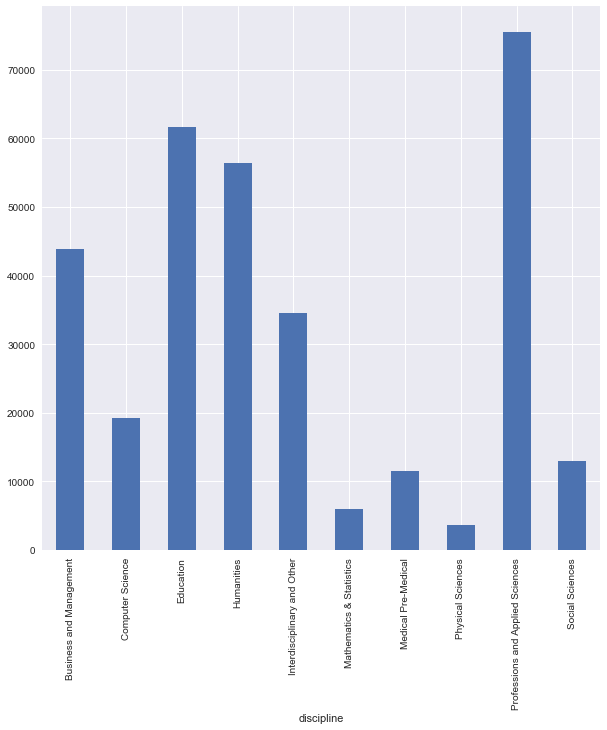

In [52]:
plt.figure(figsize = (10,10))
by_disc.plot(kind = 'bar')

From the bar chart, it looks like the Professions and Applied Sciences were the highest enrolled discipline and the Physical Sciences was the least. 

How does your field stand in comparison? 

## 2.2 - Course Breakdown

We can also break down each course in each discipline and see the number enrolled in each class.

In [286]:
breakdown = data[['discipline','course_id_DI']].groupby(['discipline','course_id_DI']).size()

In [287]:
breakdown.head()

discipline               course_id_DI
Business and Management  832945104        954
                         832945114       1422
                         832945120       2799
                         832945127       1104
                         832945129       3873
dtype: int64

Convert `breakdown` from Series to DataFrame 

In [288]:
breakdown = breakdown.to_frame().reset_index()
#breakdown = breakdown.rename(columns = {0:'list'})
#breakdown.index.name = 'index'

In [289]:
# Indexing 
breakdownBM = breakdown[0:28].set_index('course_id_DI')
breakdownCS = breakdown[28:37].set_index('course_id_DI')
breakdownE = breakdown[37:94].set_index('course_id_DI')
breakdownH = breakdown[94:123].set_index('course_id_DI')
breakdownIO = breakdown[123:139].set_index('course_id_DI')
breakdownMS = breakdown[139:146].set_index('course_id_DI')
breakdownMP = breakdown[146:151].set_index('course_id_DI')
breakdownPS = breakdown[151:157].set_index('course_id_DI')
breakdownAS = breakdown[157:230].set_index('course_id_DI')
breakdownSS = breakdown[230:239].set_index('course_id_DI')

Now we plot out the separate courses in each discipline showing the number of students enrolled in each course. 

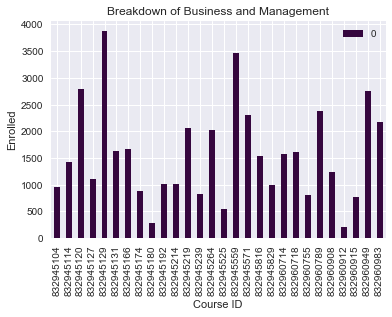

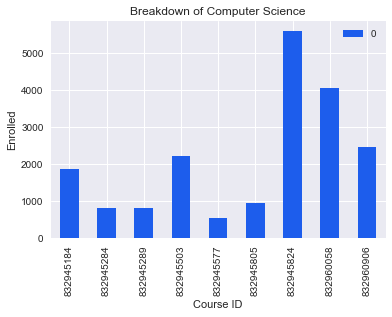

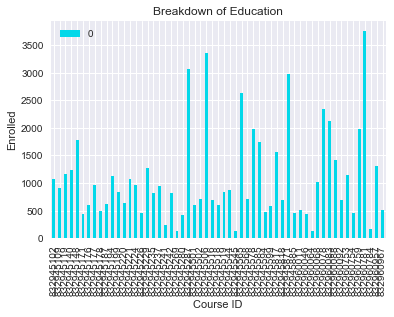

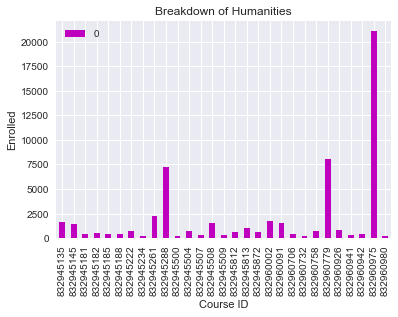

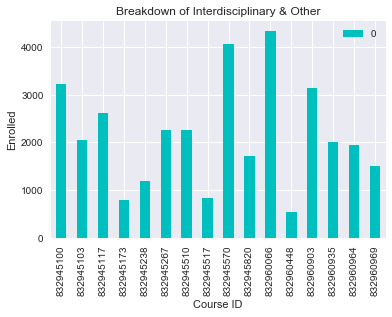

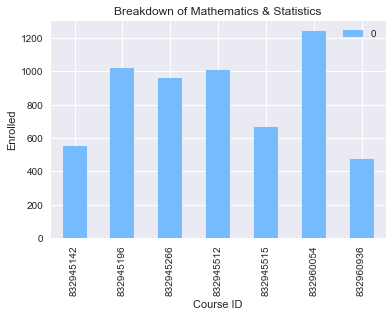

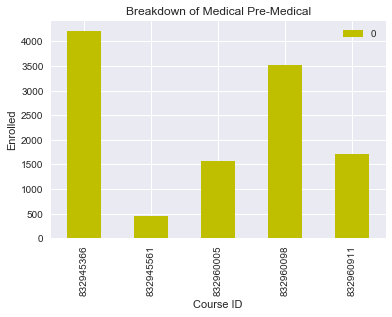

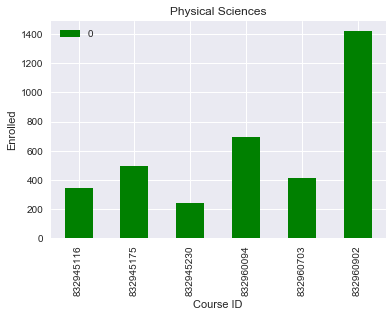

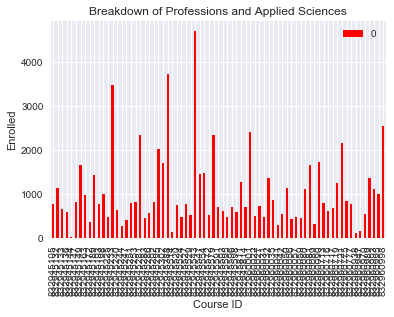

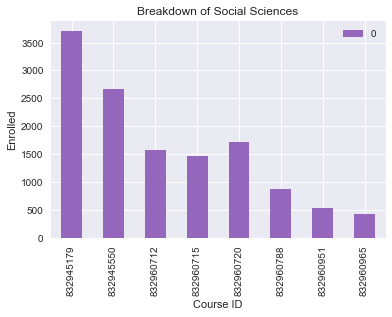

In [297]:
breakdownBM.plot(kind='bar',title = 'Breakdown of Business and Management', color = 'xkcd:dark purple')
plt.ylabel('Enrolled')
plt.xlabel('Course ID')

breakdownCS.plot(kind='bar',title = 'Breakdown of Computer Science', color = 'xkcd:azul')
plt.ylabel('Enrolled')
plt.xlabel('Course ID')

breakdownE.plot(kind='bar',title = 'Breakdown of Education', color = 'xkcd:aqua blue')
plt.ylabel('Enrolled')
plt.xlabel('Course ID')

breakdownH.plot(kind='bar',title = 'Breakdown of Humanities', color = 'm')
plt.ylabel('Enrolled')
plt.xlabel('Course ID')

breakdownIO.plot(kind='bar',title = 'Breakdown of Interdisciplinary & Other', color = 'c')
plt.ylabel('Enrolled')
plt.xlabel('Course ID')

breakdownMS.plot(kind='bar',title = 'Breakdown of Mathematics & Statistics', color = 'xkcd:sky blue')
plt.ylabel('Enrolled')
plt.xlabel('Course ID')

breakdownMP.plot(kind='bar',title = 'Breakdown of Medical Pre-Medical', color = 'y')
plt.ylabel('Enrolled')
plt.xlabel('Course ID')

breakdownPS.plot(kind='bar',title = 'Physical Sciences', color = 'g')
plt.ylabel('Enrolled')
plt.xlabel('Course ID')

breakdownAS.plot(kind='bar',title = 'Breakdown of Professions and Applied Sciences', color = 'r')
plt.ylabel('Enrolled')
plt.xlabel('Course ID')

breakdownSS.plot(kind='bar',title = 'Breakdown of Social Sciences', color = 'tab:purple')
plt.ylabel('Enrolled')
plt.xlabel('Course ID')

## 2.3 - Grades by Disciplines 

We can look at the distribution of grades by each discipline. 

In [6]:
graded = data.groupby(['discipline','grade'])['userid_DI'].nunique().unstack().fillna(0) 
# For grades with NaN values, they are replaced by 0. 

In [7]:
graded

grade,0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,...,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1.0
discipline,,,,,,,,,,,,,,,,,,,,,
Business and Management,2664.0,0.0,6.0,0.0,6.0,12.0,19.0,2.0,66.0,0.0,...,0.0,2.0,0.0,0.0,7.0,0.0,0.0,1.0,1.0,672.0
Computer Science,889.0,0.0,2.0,0.0,2.0,29.0,0.0,2.0,8.0,0.0,...,1.0,25.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,187.0
Education,6040.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,4.0,...,0.0,4.0,8.0,0.0,2.0,0.0,0.0,1.0,0.0,1815.0
Humanities,3430.0,1.0,3.0,1.0,2.0,0.0,3.0,12.0,1.0,1.0,...,2.0,1.0,227.0,0.0,0.0,2.0,0.0,0.0,0.0,1076.0
Interdisciplinary and Other,2879.0,0.0,1.0,33.0,1.0,15.0,65.0,0.0,11.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
Mathematics & Statistics,1069.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,263.0
Medical Pre-Medical,161.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,18.0
Physical Sciences,238.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,52.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
Professions and Applied Sciences,5571.0,3.0,30.0,45.0,10.0,52.0,100.0,15.0,102.0,15.0,...,6.0,3.0,11.0,21.0,1.0,2.0,4.0,0.0,0.0,373.0


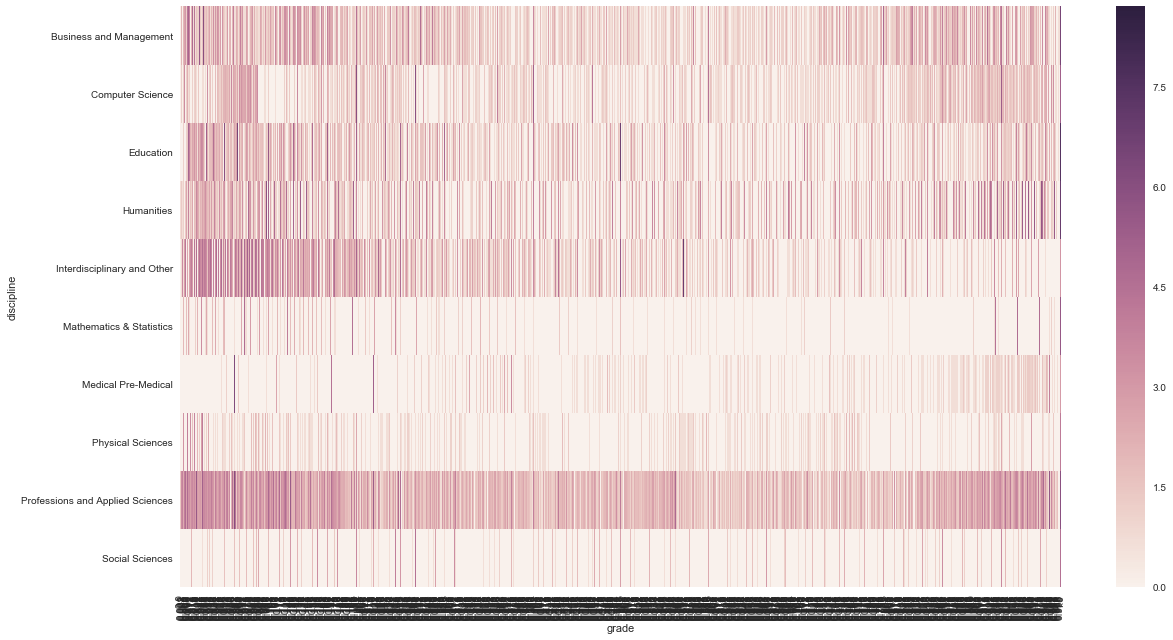

In [8]:
plt.figure(figsize = (18,9))
sns.heatmap(np.log(1+graded))
plt.tight_layout()

The x-axis is a bit messy, but in essence, the grade distributions run from 0.0 to 1.0, or 0% o 100%. The colour slider on the right highlights the number of people who achieved x grades

## 2.4 - Passing Grades 

Suppose we only care to see those courses where the grade distribution is over 50% or 0.5 

Let's begin by resorting the data. 

In [31]:
greater_than_50 = data[['discipline','grade']]
greater_than_50 = greater_than_50[greater_than_50['grade'] > 0.5].groupby('discipline')

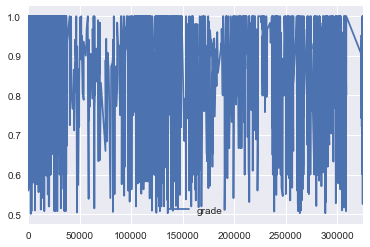

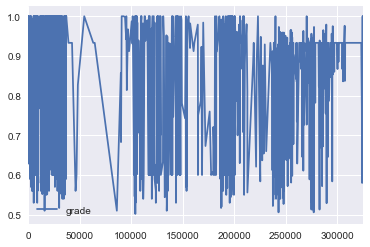

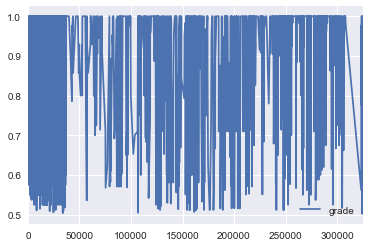

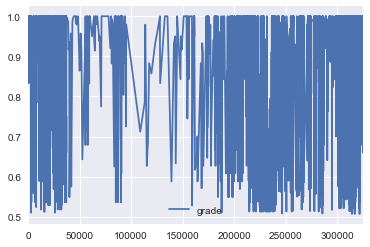

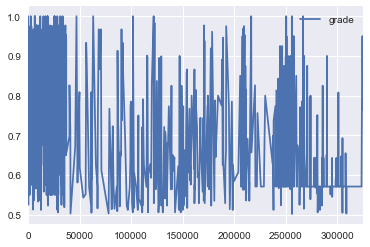

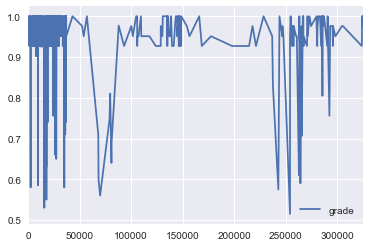

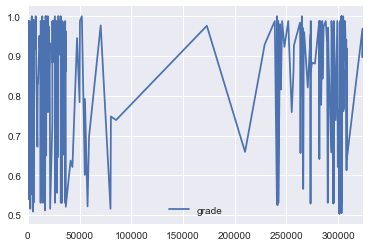

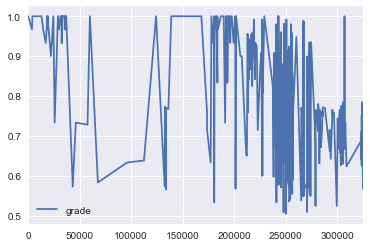

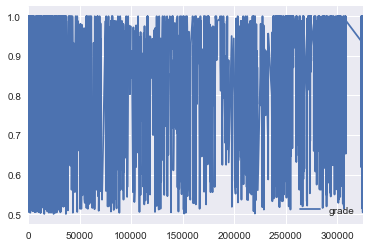

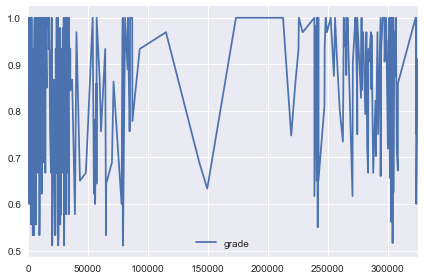

In [35]:
plt.figure(figsize=(30,5))
greater_than_50.plot(kind='line')
plt.tight_layout()

## 2.5 -  Course Lengths 

Say we're interested in finding out what are longest and shortest courses offered. 

In [3]:
course_len_longest = data[['discipline','course_length']].sort_values(by = 'course_length', ascending = 0)

In [4]:
course_len_longest.head(1)

,discipline,course_length
237874,Professions and Applied Sciences,392


In [5]:
course_len_longest.tail(1)

,discipline,course_length
123858,Professions and Applied Sciences,12


We find that the longest course is 392 days in the Professions and Applied Sciences field and the shortest course is 12 days also in the Professions and Applied Sciences field. 